Анализ эпидемии:
Общая численность: N = 19000.0
Начальные условия: S₀ = 18862.0, I₀ = 119.0, R₀ = 19.0
Базовое репродуктивное число: R₀ = 3.0
Критическое число инфицированных: I* = 6333.33
Случай 1: I₀ ≤ I* - эпидемия будет слабой


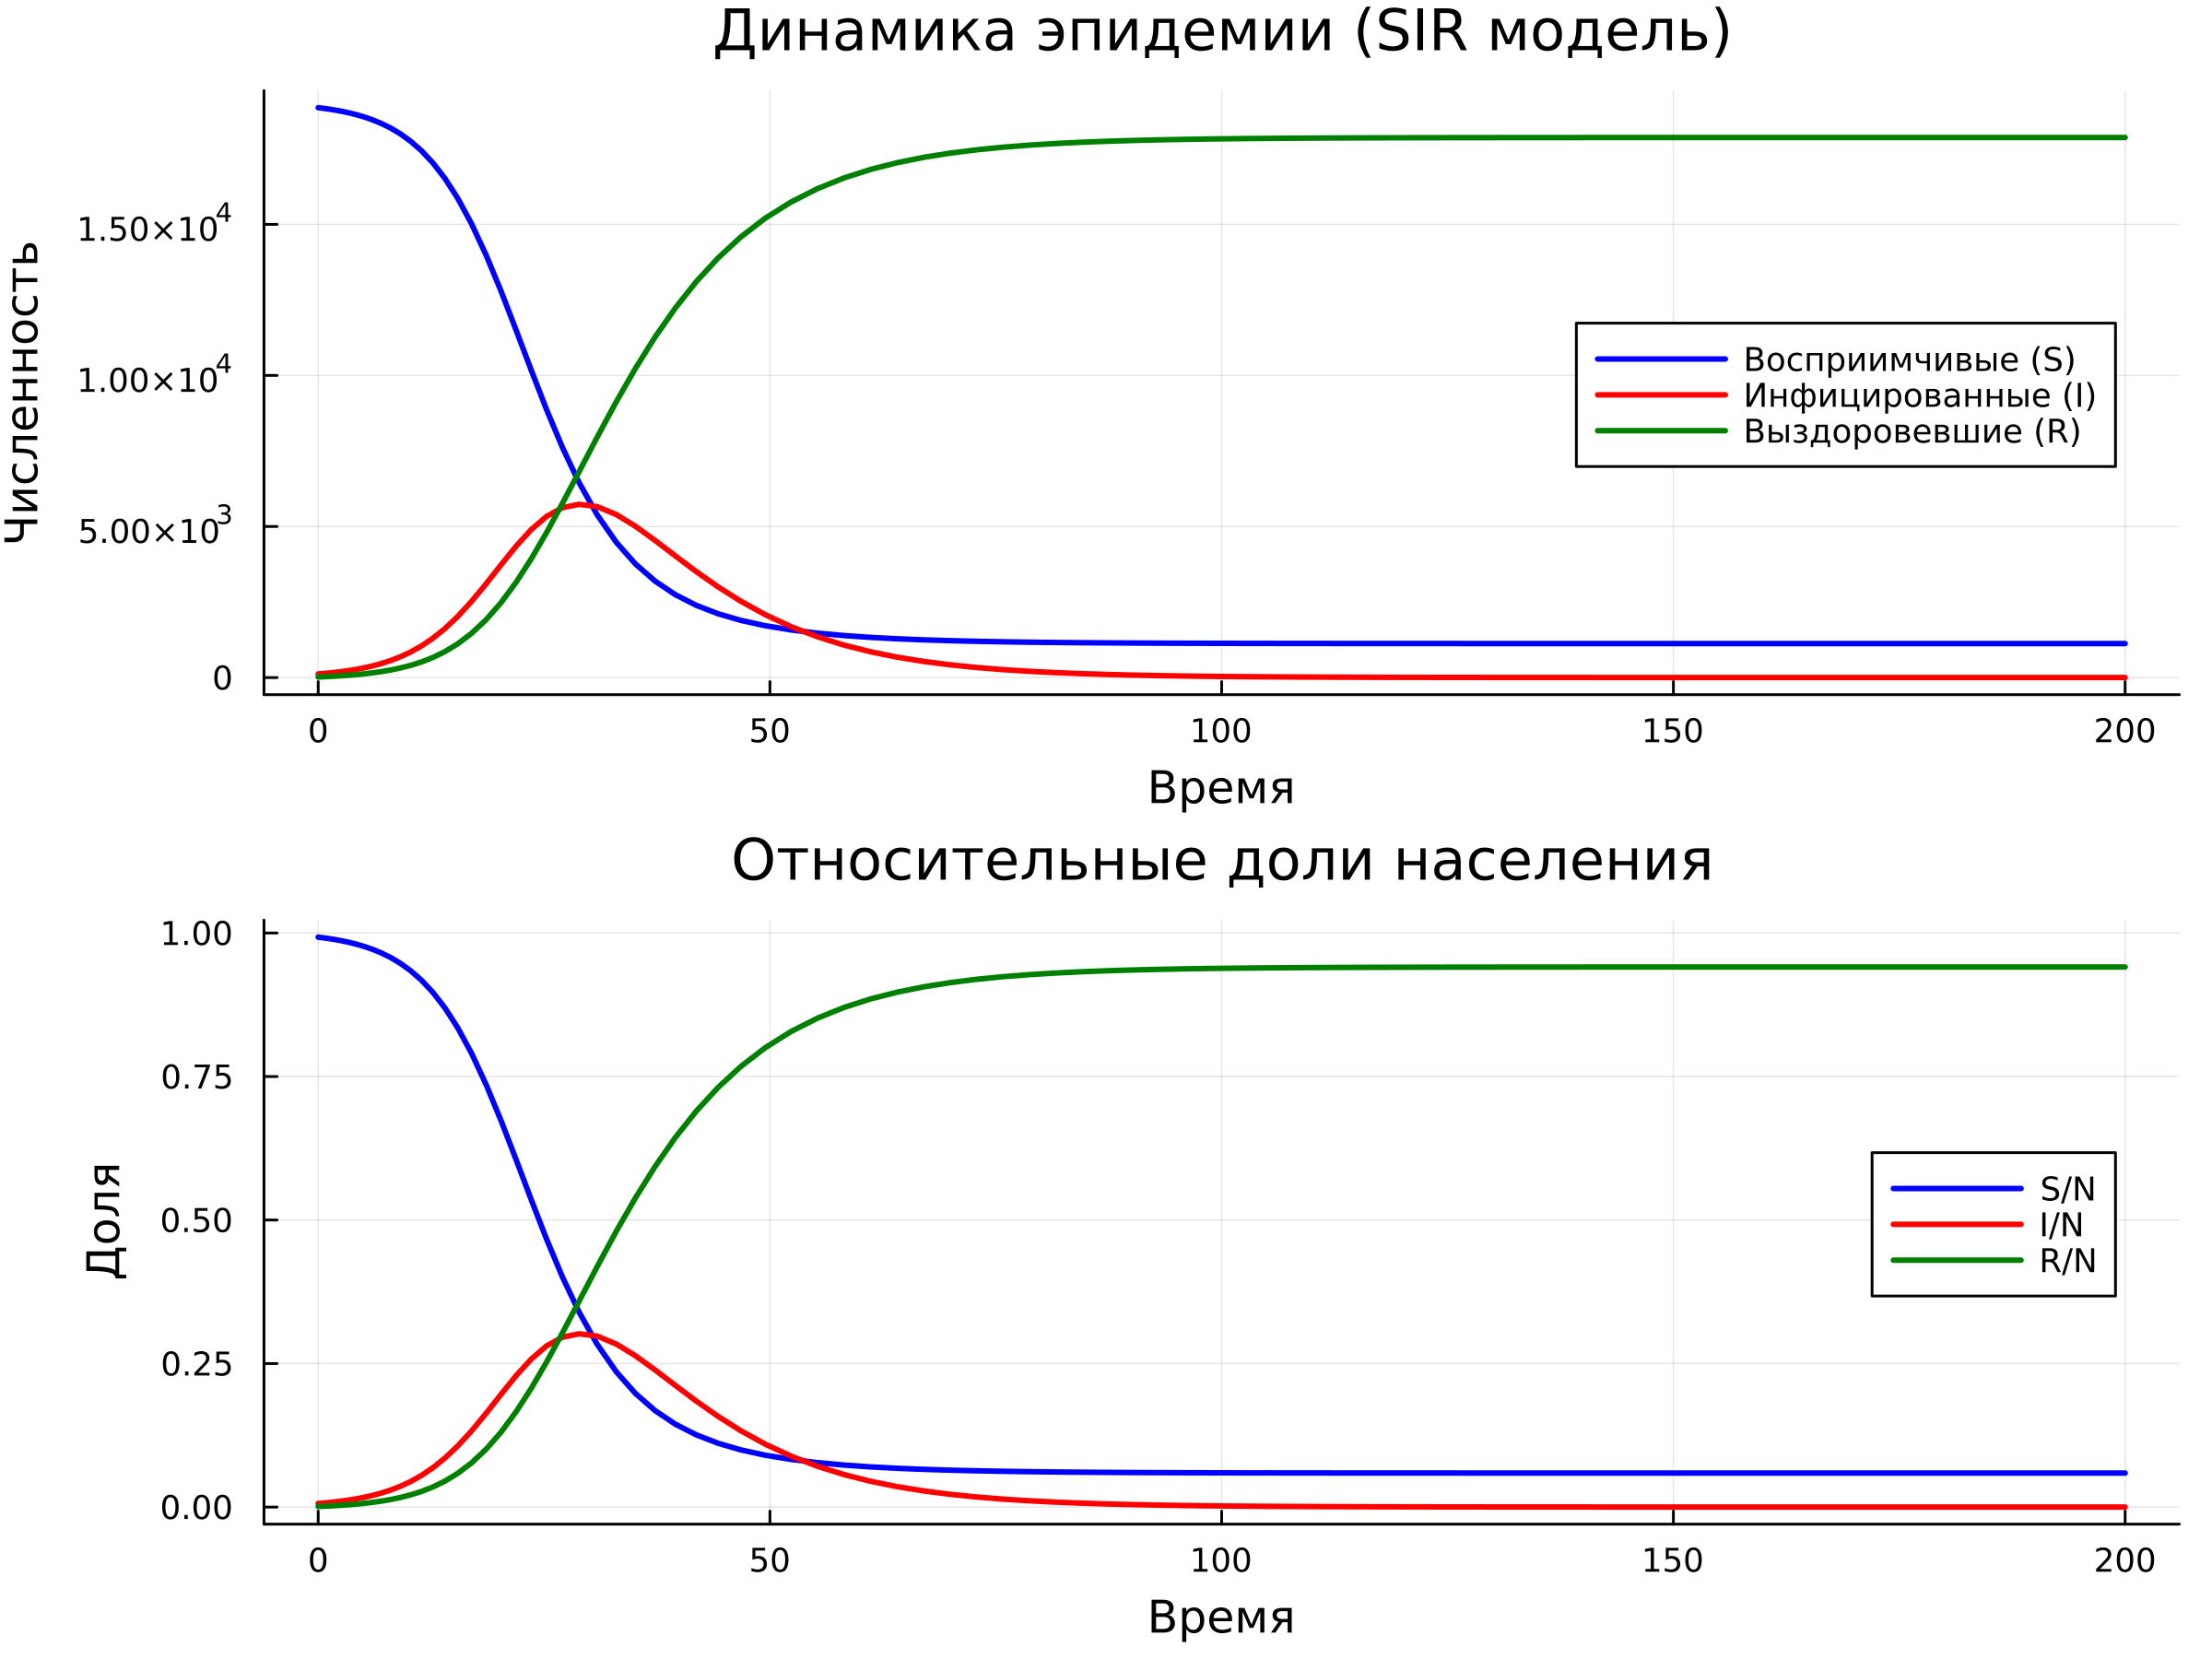


График сохранен в файл: epidemic_dynamics.png


In [2]:
using DifferentialEquations, Plots

# Параметры модели для варианта 13
N = 19000.0       # Общая численность населения
beta = 0.3        # Коэффициент заражения
gamma = 0.1       # Коэффициент выздоровления

# Начальные условия
S0 = N - 119 - 19 # Восприимчивые: 19000 - 119 - 19 = 18862
I0 = 119.0        # Инфицированные
R0 = 19.0         # Выздоровевшие с иммунитетом

u0 = [S0, I0, R0] # Начальные условия [S, I, R]
tspan = (0.0, 200.0) # Временной интервал

# Система уравнений SIR модели
function sir_model!(du, u, p, t)
    S, I, R = u
    beta, gamma, N = p
    
    du[1] = -beta * S * I / N       # dS/dt
    du[2] = beta * S * I / N - gamma * I  # dI/dt
    du[3] = gamma * I               # dR/dt
end

# Параметры модели
p = (beta, gamma, N)

# Решение системы
prob = ODEProblem(sir_model!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-6, abstol=1e-6)

# Построение графиков
plt = plot(layout=(2,1), size=(800, 600), dpi=300)

# График 1: Изменение численности групп
plot!(plt[1], sol.t, sol[1,:], label="Восприимчивые (S)", linewidth=2, color=:blue)
plot!(plt[1], sol.t, sol[2,:], label="Инфицированные (I)", linewidth=2, color=:red)
plot!(plt[1], sol.t, sol[3,:], label="Выздоровевшие (R)", linewidth=2, color=:green)
plot!(plt[1], title="Динамика эпидемии (SIR модель)", xlabel="Время", ylabel="Численность", legend=:right)

# График 2: Относительные доли
plot!(plt[2], sol.t, sol[1,:]./N, label="S/N", linewidth=2, color=:blue)
plot!(plt[2], sol.t, sol[2,:]./N, label="I/N", linewidth=2, color=:red)
plot!(plt[2], sol.t, sol[3,:]./N, label="R/N", linewidth=2, color=:green)
plot!(plt[2], title="Относительные доли населения", xlabel="Время", ylabel="Доля", legend=:right)

# Анализ порогового значения
R0_effective = beta / gamma  # Базовое репродуктивное число
I_critical = N * (gamma / beta)  # Критическое число инфицированных

println("Анализ эпидемии:")
println("Общая численность: N = ", N)
println("Начальные условия: S₀ = ", S0, ", I₀ = ", I0, ", R₀ = ", R0)
println("Базовое репродуктивное число: R₀ = ", round(R0_effective, digits=2))
println("Критическое число инфицированных: I* = ", round(I_critical, digits=2))

# Проверка условий
if I0 <= I_critical
    println("Случай 1: I₀ ≤ I* - эпидемия будет слабой")
else
    println("Случай 2: I₀ > I* - ожидается сильная эпидемия")
end

# Отображение графиков
display(plt)

# Сохранение результатов
savefig("epidemic_dynamics.png")
println("\nГрафик сохранен в файл: epidemic_dynamics.png")